In [18]:
import pandas as pd
from os import listdir
from os.path import isfile, join
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [19]:
path = "../data/number/"

onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]
df_number = pd.DataFrame(columns=['label', 'x', 'y', 'time_taken', 'speed', 'strokes'])

for file in onlyfiles:
    with open(path+file) as f:
        content = f.readlines()
        label = int(content[0])



        strokes = int(content[len(content)-1][11:12]) #How many strokes of the pen
        n_row = 3
        x = []
        y = []
        time_taken   = []

        for _ in range(strokes):
            if n_row < len(content)-3:
                if(content[n_row] == "Pen Down (x,y)\n"):
                    n_row += 1
                
                while content[n_row] != 'Pen Up\n' and content[n_row] != '\n': #Take all of the axis
                    xi, yi = content[n_row].split('_')
                    yi = yi[:-1]
                    n_row += 1
                    x.append(float(xi))
                    y.append(float(yi))
                    if n_row >= len(content)-3 :
                        break

                n_row += 1

                if content[n_row][0] == "T": #If there is written "Time_taken"
                    time_taken.append(content[n_row][11:16])
                    n_row += 1
                
                if content[n_row][0] == "T": #There are double "Time_taken" 
                    n_row += 1
        
        speed = content[len(content)-2][7:12]
        

        df_temp = pd.DataFrame([[label,x,y,time_taken, speed, strokes]], columns=['label', 'x', 'y', 'time_taken', 'speed', 'strokes'])
        df_number = pd.concat([df_number, df_temp])


df_number = df_number.drop(columns="time_taken") 

# Drop column time_taken beacuse is not good. It can be fixed
# But it's not so important because we have also the ratio speed that is strokes/seconds



In [20]:
# df_number.to_csv("data/number/number.csv", index=False)

df_number[df_number['strokes'] > 1]

,label,x,y,speed,strokes
0,4,"[675.0, 664.0, 659.0, 644.0, 638.0, 626.0, 611...","[264.0, 285.0, 293.0, 320.0, 329.0, 348.0, 370...",2.415,2
0,3,"[498.0, 493.0, 492.0, 490.0, 493.0, 506.0, 527...","[237.0, 237.0, 237.0, 237.0, 235.0, 227.0, 218...",1.700,2
0,4,"[687.0, 634.0, 595.0, 552.0, 530.0, 464.0, 445...","[149.0, 200.0, 234.0, 269.0, 285.0, 331.0, 345...",2.461,2
0,5,"[774.0, 743.0, 725.0, 706.0, 685.0, 660.0, 636...","[88.0, 96.0, 108.0, 126.0, 151.0, 182.0, 216.0...",2.666,2
0,5,"[636.0, 630.0, 629.0, 631.0, 641.0, 658.0, 684...","[270.0, 285.0, 297.0, 307.0, 315.0, 321.0, 326...",4.741,2
...,...,...,...,...,...
0,4,"[656.0, 639.0, 612.0, 581.0, 532.0, 519.0, 494...","[167.0, 178.0, 195.0, 213.0, 244.0, 253.0, 278...",3.200,2
0,9,"[494.0, 450.0, 424.0, 404.0, 391.0, 387.0, 384...","[100.0, 124.0, 143.0, 165.0, 189.0, 201.0, 238...",3.490,3
0,9,"[728.0, 719.0, 710.0, 705.0, 694.0, 684.0, 672...","[147.0, 149.0, 151.0, 152.0, 156.0, 160.0, 165...",1.751,3
0,4,"[864.0, 826.0, 788.0, 775.0, 749.0, 724.0, 688...","[251.0, 320.0, 389.0, 411.0, 452.0, 490.0, 540...",2.908,2


In [21]:
# df_number = pd.read_csv("data/number.csv")

# train_size = int(0.7*len(df_number))
df_number_train = df_number
# df_number_test = df_number[train_size:]

In [22]:
df_number_train[df_number_train['x'].map(lambda d: len(d)) > 0]

for i in range(len(df_number_train)):
    if df_number_train.iloc[i,1] == []:
        df_number_train.iloc[i,1] = np.nan

df_number_train.dropna(subset=['x'], inplace=True)
df_number_train

,label,x,y,speed,strokes
0,5,"[908.0, 925.0, 925.0, 888.0, 832.0, 765.0, 705...","[212.0, 207.0, 206.0, 208.0, 210.0, 210.0, 211...",1.454,1
0,1,"[639.0, 647.0, 649.0, 653.0, 655.0, 657.0, 658...","[133.0, 147.0, 152.0, 176.0, 197.0, 238.0, 268...",1.939,1
0,3,"[499.0, 550.0, 573.0, 623.0, 674.0, 739.0, 754...","[154.0, 140.0, 137.0, 132.0, 131.0, 140.0, 146...",1.640,1
0,2,"[481.0, 508.0, 519.0, 561.0, 578.0, 635.0, 655...","[214.0, 188.0, 178.0, 150.0, 142.0, 127.0, 126...",1.599,1
0,3,"[509.0, 533.0, 576.0, 608.0, 638.0, 665.0, 688...","[39.0, 31.0, 23.0, 20.0, 22.0, 30.0, 45.0, 81....",1.120,1
...,...,...,...,...,...
0,9,"[728.0, 719.0, 710.0, 705.0, 694.0, 684.0, 672...","[147.0, 149.0, 151.0, 152.0, 156.0, 160.0, 165...",1.751,3
0,4,"[864.0, 826.0, 788.0, 775.0, 749.0, 724.0, 688...","[251.0, 320.0, 389.0, 411.0, 452.0, 490.0, 540...",2.908,2
0,2,"[234.0, 256.0, 266.0, 299.0, 313.0, 363.0, 382...","[155.0, 123.0, 112.0, 80.0, 70.0, 47.0, 41.0, ...",1.230,1
0,0,"[680.0, 670.0, 656.0, 643.0, 627.0, 609.0, 593...","[219.0, 223.0, 233.0, 248.0, 269.0, 297.0, 329...",1.049,1


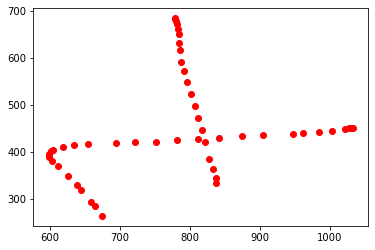

In [23]:
n = 6

plt.plot(df_number_train['x'].iloc[n], df_number_train['y'].iloc[n], 'ro')

#Sono al contrario

In [24]:
df_number_train.iloc[n]

label                                                      4
x          [675.0, 664.0, 659.0, 644.0, 638.0, 626.0, 611...
y          [264.0, 285.0, 293.0, 320.0, 329.0, 348.0, 370...
speed                                                  2.415
strokes                                                    2
Name: 0, dtype: object

In [25]:
# Take only a subset of the dataframe
# df_number_train = df_number_train[:10]  #THEN REMOVE

# RIMUOVO QUELLI CON PIÙ DI UN STROKE PERCHÉ MI ROMPONO IL CAZZO (poi aggiustare)
# df_number_train = df_number_train[df_number_train['strokes'] == 1]

# Rimuovo tutte quelle con < 11 (x,y)
df_number_train = df_number_train[df_number_train['x'].map(lambda d: len(d)) > 15]

# Setto l'indice della tabella per ogni riga
index = pd.Series(np.arange(len(df_number_train)))
df_number_train.set_index(index, inplace=True)

In [26]:
# Calculate normalize y

normalized_y = []

for idx, row in df_number_train.iterrows():
    min_coordinate = min(row['y'])
    max_coordinate = max(row['y'])
    norm_y = [round((y - min_coordinate)/max_coordinate, 3) for y in row['y']]
    normalized_y.append(norm_y)

df_number_train['norm_y'] = normalized_y

normalized_x = []

for idx, row in df_number_train.iterrows():
    min_coordinate = min(row['x'])
    max_coordinate = max(row['x'])
    norm_x = [round((x - min_coordinate)/max_coordinate, 3) for x in row['x']]
    normalized_x.append(norm_x)

df_number_train['norm_x'] = normalized_x
df_number_train

/tmp/ipykernel_23889/2809225455.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_number_train['norm_y'] = normalized_y
/tmp/ipykernel_23889/2809225455.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_number_train['norm_x'] = normalized_x


,label,x,y,speed,strokes,norm_y,norm_x
0,5,"[908.0, 925.0, 925.0, 888.0, 832.0, 765.0, 705...","[212.0, 207.0, 206.0, 208.0, 210.0, 210.0, 211...",1.454,1,"[0.011, 0.002, 0.0, 0.004, 0.007, 0.007, 0.009...","[0.351, 0.369, 0.369, 0.33, 0.27, 0.199, 0.135..."
1,1,"[639.0, 647.0, 649.0, 653.0, 655.0, 657.0, 658...","[133.0, 147.0, 152.0, 176.0, 197.0, 238.0, 268...",1.939,1,"[0.0, 0.023, 0.032, 0.071, 0.106, 0.174, 0.224...","[0.0, 0.012, 0.015, 0.021, 0.024, 0.027, 0.028..."
2,3,"[499.0, 550.0, 573.0, 623.0, 674.0, 739.0, 754...","[154.0, 140.0, 137.0, 132.0, 131.0, 140.0, 146...",1.640,1,"[0.037, 0.014, 0.01, 0.002, 0.0, 0.014, 0.024,...","[0.0, 0.054, 0.078, 0.13, 0.184, 0.252, 0.268,..."
3,2,"[481.0, 508.0, 519.0, 561.0, 578.0, 635.0, 655...","[214.0, 188.0, 178.0, 150.0, 142.0, 127.0, 126...",1.599,1,"[0.146, 0.103, 0.086, 0.04, 0.027, 0.002, 0.0,...","[0.07, 0.098, 0.109, 0.152, 0.17, 0.228, 0.248..."
4,3,"[509.0, 533.0, 576.0, 608.0, 638.0, 665.0, 688...","[39.0, 31.0, 23.0, 20.0, 22.0, 30.0, 45.0, 81....",1.120,1,"[0.027, 0.016, 0.004, 0.0, 0.003, 0.014, 0.036...","[0.077, 0.105, 0.156, 0.193, 0.228, 0.26, 0.28..."
...,...,...,...,...,...,...,...
1234,9,"[728.0, 719.0, 710.0, 705.0, 694.0, 684.0, 672...","[147.0, 149.0, 151.0, 152.0, 156.0, 160.0, 165...",1.751,3,"[0.013, 0.016, 0.018, 0.02, 0.025, 0.03, 0.037...","[0.214, 0.204, 0.195, 0.19, 0.179, 0.168, 0.15..."
1235,4,"[864.0, 826.0, 788.0, 775.0, 749.0, 724.0, 688...","[251.0, 320.0, 389.0, 411.0, 452.0, 490.0, 540...",2.908,2,"[0.0, 0.097, 0.194, 0.224, 0.282, 0.335, 0.405...","[0.184, 0.151, 0.117, 0.105, 0.082, 0.06, 0.02..."
1236,2,"[234.0, 256.0, 266.0, 299.0, 313.0, 363.0, 382...","[155.0, 123.0, 112.0, 80.0, 70.0, 47.0, 41.0, ...",1.230,1,"[0.189, 0.141, 0.124, 0.076, 0.061, 0.027, 0.0...","[0.0, 0.025, 0.037, 0.075, 0.091, 0.149, 0.171..."
1237,0,"[680.0, 670.0, 656.0, 643.0, 627.0, 609.0, 593...","[219.0, 223.0, 233.0, 248.0, 269.0, 297.0, 329...",1.049,1,"[0.041, 0.048, 0.064, 0.089, 0.123, 0.169, 0.2...","[0.114, 0.103, 0.087, 0.072, 0.054, 0.034, 0.0..."


In [27]:
# Calculate angle between two points in a strange mathod (BUT correct)

def calculate_arctan2_of_two_points(x1, y1, x2, y2):
    angle = np.arctan2(y2-y1, x2-x1)
    return angle


angles = []
i = 0

for i in range(len(df_number_train)):
    number = df_number_train.iloc[i]
    vector_of_angles = []
    for p in range(len(number['x'])-1):
        angle = calculate_arctan2_of_two_points(number['x'][p], number['y'][p], number['x'][p+1], number['y'][p+1])
        # angle = calculate_arctan2_of_two_points(number['norm_x'][p], number['norm_y'][p], number['norm_x'][p+1], number['norm_y'][p+1])
        angle = round(angle, 2)
        vector_of_angles.append(angle)
    # angles[i] = vector_of_angles
    angles.append(vector_of_angles)


df_number_train['angles'] = angles
df_number_train.head()

/tmp/ipykernel_23889/4036947378.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_number_train['angles'] = angles


,label,x,y,speed,strokes,norm_y,norm_x,angles
0,5,"[908.0, 925.0, 925.0, 888.0, 832.0, 765.0, 705...","[212.0, 207.0, 206.0, 208.0, 210.0, 210.0, 211...",1.454,1,"[0.011, 0.002, 0.0, 0.004, 0.007, 0.007, 0.009...","[0.351, 0.369, 0.369, 0.33, 0.27, 0.199, 0.135...","[-0.29, -1.57, 3.09, 3.11, 3.14, 3.12, 3.12, 3..."
1,1,"[639.0, 647.0, 649.0, 653.0, 655.0, 657.0, 658...","[133.0, 147.0, 152.0, 176.0, 197.0, 238.0, 268...",1.939,1,"[0.0, 0.023, 0.032, 0.071, 0.106, 0.174, 0.224...","[0.0, 0.012, 0.015, 0.021, 0.024, 0.027, 0.028...","[1.05, 1.19, 1.41, 1.48, 1.52, 1.54, 1.54, 1.4..."
2,3,"[499.0, 550.0, 573.0, 623.0, 674.0, 739.0, 754...","[154.0, 140.0, 137.0, 132.0, 131.0, 140.0, 146...",1.640,1,"[0.037, 0.014, 0.01, 0.002, 0.0, 0.014, 0.024,...","[0.0, 0.054, 0.078, 0.13, 0.184, 0.252, 0.268,...","[-0.27, -0.13, -0.1, -0.02, 0.14, 0.38, 0.62, ..."
3,2,"[481.0, 508.0, 519.0, 561.0, 578.0, 635.0, 655...","[214.0, 188.0, 178.0, 150.0, 142.0, 127.0, 126...",1.599,1,"[0.146, 0.103, 0.086, 0.04, 0.027, 0.002, 0.0,...","[0.07, 0.098, 0.109, 0.152, 0.17, 0.228, 0.248...","[-0.77, -0.74, -0.59, -0.44, -0.26, -0.05, 0.0..."
4,3,"[509.0, 533.0, 576.0, 608.0, 638.0, 665.0, 688...","[39.0, 31.0, 23.0, 20.0, 22.0, 30.0, 45.0, 81....",1.120,1,"[0.027, 0.016, 0.004, 0.0, 0.003, 0.014, 0.036...","[0.077, 0.105, 0.156, 0.193, 0.228, 0.26, 0.28...","[-0.32, -0.18, -0.09, 0.07, 0.29, 0.58, 1.04, ..."


In [28]:
def calculate_arctan2(x1, y1):
    angle = np.arctan2(y1, x1)
    return angle

# angles = pd.Series(index=df_number_train.index)
angles = []
i = 0

for i in range(len(df_number_train)):
    number = df_number_train.iloc[i]
    vector_of_angles = []
    for p in range(len(number['x'])-1):
        angle = calculate_arctan2(number['x'][p], number['y'][p])
        # angle = calculate_arctan2(number['norm_x'][p], number['norm_y'][p])
        angle = round(angle, 2)
        vector_of_angles.append(angle)
    angles.append(vector_of_angles)


df_number_train['angles_one'] = angles
df_number_train.head()

/tmp/ipykernel_23889/128785190.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_number_train['angles_one'] = angles


,label,x,y,speed,strokes,norm_y,norm_x,angles,angles_one
0,5,"[908.0, 925.0, 925.0, 888.0, 832.0, 765.0, 705...","[212.0, 207.0, 206.0, 208.0, 210.0, 210.0, 211...",1.454,1,"[0.011, 0.002, 0.0, 0.004, 0.007, 0.007, 0.009...","[0.351, 0.369, 0.369, 0.33, 0.27, 0.199, 0.135...","[-0.29, -1.57, 3.09, 3.11, 3.14, 3.12, 3.12, 3...","[0.23, 0.22, 0.22, 0.23, 0.25, 0.27, 0.29, 0.3..."
1,1,"[639.0, 647.0, 649.0, 653.0, 655.0, 657.0, 658...","[133.0, 147.0, 152.0, 176.0, 197.0, 238.0, 268...",1.939,1,"[0.0, 0.023, 0.032, 0.071, 0.106, 0.174, 0.224...","[0.0, 0.012, 0.015, 0.021, 0.024, 0.027, 0.028...","[1.05, 1.19, 1.41, 1.48, 1.52, 1.54, 1.54, 1.4...","[0.21, 0.22, 0.23, 0.26, 0.29, 0.35, 0.39, 0.4..."
2,3,"[499.0, 550.0, 573.0, 623.0, 674.0, 739.0, 754...","[154.0, 140.0, 137.0, 132.0, 131.0, 140.0, 146...",1.640,1,"[0.037, 0.014, 0.01, 0.002, 0.0, 0.014, 0.024,...","[0.0, 0.054, 0.078, 0.13, 0.184, 0.252, 0.268,...","[-0.27, -0.13, -0.1, -0.02, 0.14, 0.38, 0.62, ...","[0.3, 0.25, 0.23, 0.21, 0.19, 0.19, 0.19, 0.21..."
3,2,"[481.0, 508.0, 519.0, 561.0, 578.0, 635.0, 655...","[214.0, 188.0, 178.0, 150.0, 142.0, 127.0, 126...",1.599,1,"[0.146, 0.103, 0.086, 0.04, 0.027, 0.002, 0.0,...","[0.07, 0.098, 0.109, 0.152, 0.17, 0.228, 0.248...","[-0.77, -0.74, -0.59, -0.44, -0.26, -0.05, 0.0...","[0.42, 0.35, 0.33, 0.26, 0.24, 0.2, 0.19, 0.18..."
4,3,"[509.0, 533.0, 576.0, 608.0, 638.0, 665.0, 688...","[39.0, 31.0, 23.0, 20.0, 22.0, 30.0, 45.0, 81....",1.120,1,"[0.027, 0.016, 0.004, 0.0, 0.003, 0.014, 0.036...","[0.077, 0.105, 0.156, 0.193, 0.228, 0.26, 0.28...","[-0.32, -0.18, -0.09, 0.07, 0.29, 0.58, 1.04, ...","[0.08, 0.06, 0.04, 0.03, 0.03, 0.05, 0.07, 0.1..."


In [29]:
# df_number_train
# B è la distanza da quello prima
# C è la distanza da quello dopo
# A è la tangente del punto

angles = []
i = 0

for i in range(len(df_number_train)):
    number = df_number_train.iloc[i]
    vector_of_angles = []
    for p in range(4,len(number['x'])-4):
        B = np.sqrt((number['x'][p] - number['x'][p+4])**2 + (number['y'][p] - number['y'][p+4])**2)
        C = np.sqrt((number['x'][p] - number['x'][p-4])**2 + (number['y'][p] - number['y'][p-4])**2)
        A = np.sqrt((number['x'][p+4] - number['x'][p-4])**2 + (number['y'][p+4] - number['y'][p-4])**2)
        
        # B = np.sqrt((number['norm_x'][p] - number['norm_x'][p+4])**2 + (number['norm_y'][p] - number['norm_y'][p+4])**2)
        # C = np.sqrt((number['norm_x'][p] - number['norm_x'][p-4])**2 + (number['norm_y'][p] - number['norm_y'][p-4])**2)
        # A = np.sqrt((number['norm_x'][p+4] - number['norm_x'][p-4])**2 + (number['norm_y'][p+4] - number['norm_y'][p-4])**2)

        angle = np.arccos(round((B**2 + C**2 - A**2)/(2*B*C), 5))          
        angle = round(angle, 4)
        if np.isnan(angle): #To fix
            angle = 0
        vector_of_angles.append(angle)
            
    # angles[i] = vector_of_angles
    angles.append(vector_of_angles)

df_number_train['angles_tangent'] = angles
# df_number_train['angles_tangent'].iloc[10] #- df_number_train['angles'].iloc[10]
# list(set(df_number_train['angles_tangent'].iloc[10]) - set(df_number_train['angles'].iloc[10]))
# df_number_train

/tmp/ipykernel_23889/3178376644.py:21: RuntimeWarning: invalid value encountered in double_scalars
  angle = np.arccos(round((B**2 + C**2 - A**2)/(2*B*C), 5))
/tmp/ipykernel_23889/3178376644.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_number_train['angles_tangent'] = angles


In [30]:
# class_one = df_number_train[df_number_train['label'] == 1]
# class_one
# type(df_number_train['angles'])


In [31]:
# train test split

X_train, test = train_test_split(df_number_train, test_size=0.2, random_state=42)

%store test

print("shapes: ", X_train.shape, test.shape)

Stored 'test' (DataFrame)
shapes:  (991, 10) (248, 10)


In [32]:
#Divide the dataframe for each label 
# Since we will contruct a HMM for each label

temp = X_train.groupby(['label'])
df_classes = {}
# for row in df_number_train:
#     df_classes[row]['label'].append(row)
for name, group in temp:
    df_classes[name] = group
    print("len of class ", name, ": ", len(group))


# See if x and y are only numbers (Se ho sbagliato ad importare da tutti i file txt)
for name, group in df_classes.items():
    for i in range(len(group)):
        if type(group.iloc[i]['x']) != list:
            print("Error in x")
        if type(group.iloc[i]['y']) != list:
            print("Error in y")
        if type(group.iloc[i]['speed']) != str:
            print("Error in speed")
        if type(group.iloc[i]['strokes']) != int:
            print("Error in strokes")
        if type(group.iloc[i]['angles']) != list:
            print("Error in angles")
        if type(group.iloc[i]['label']) != int:
            print("Error in label")
        if type(group.iloc[i]['x']) != list:
            print("Error in x")
        if type(group.iloc[i]['y']) != list:
            print("Error in y")
        if type(group.iloc[i]['speed']) != str:
            print("Error in speed")
        if type(group.iloc[i]['strokes']) != int:
            print("Error in strokes")
        if type(group.iloc[i]['angles']) != list:
            print("Error in angles")
        if type(group.iloc[i]['label']) != int:
            print("Error in label")
        if type(group.iloc[i]['x']) != list:
            print("Error in x")
        if type(group.iloc[i]['y']) != list:
            print("Error in y")

#Divide the dataset into the different classes

len of class  0 :  89
len of class  1 :  66
len of class  2 :  105
len of class  3 :  104
len of class  4 :  103
len of class  5 :  108
len of class  6 :  108
len of class  7 :  100
len of class  8 :  109
len of class  9 :  99


In [33]:
%store df_classes

Stored 'df_classes' (dict)


Dataset is balanced


## HMM problem and solutions
* Evaluation:
    * Problem - Compute Probabilty of observation sequence given a model
    * Solution - Forward Algorithm and Viterbi Algorithm
* Decoding:
    * Problem - Find state sequence which maximizes probability of observation sequence
    * Solution - Viterbi Algorithm
* Training:
    * Problem - Adjust model parameters to maximize probability of observed sequences
    * Solution - Forward-Backward Algorithm